In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [6]:
df= pd.read_csv('Dataset/winequality.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis and Visualization

In [8]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


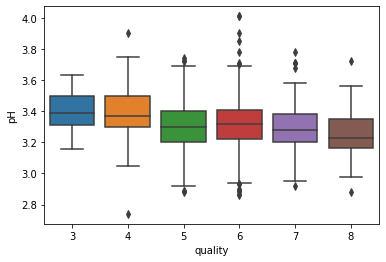

In [9]:
sns.boxplot(x='quality', y='pH',data=df)

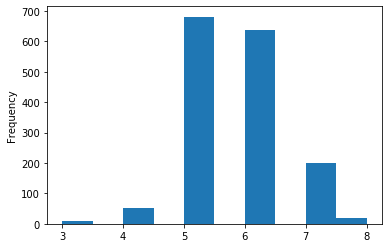

In [10]:
df['quality'].plot(kind='hist')

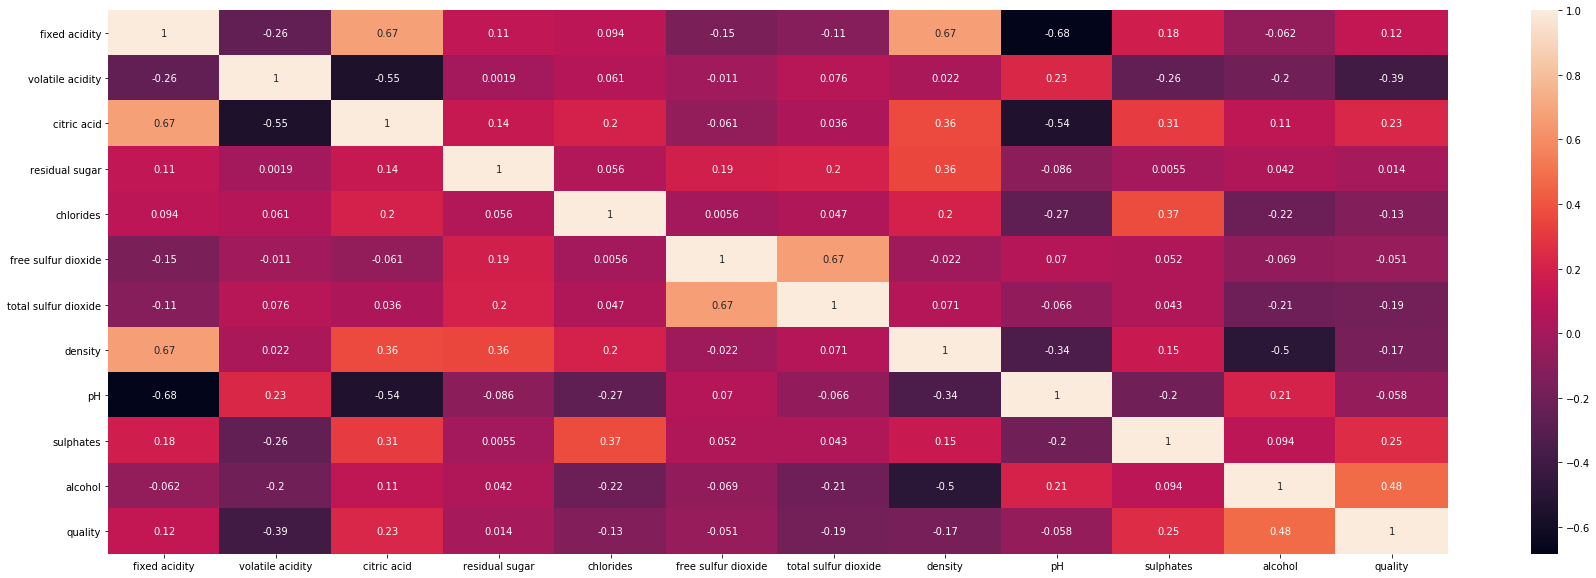

In [11]:
correlation= df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(correlation,annot=True)

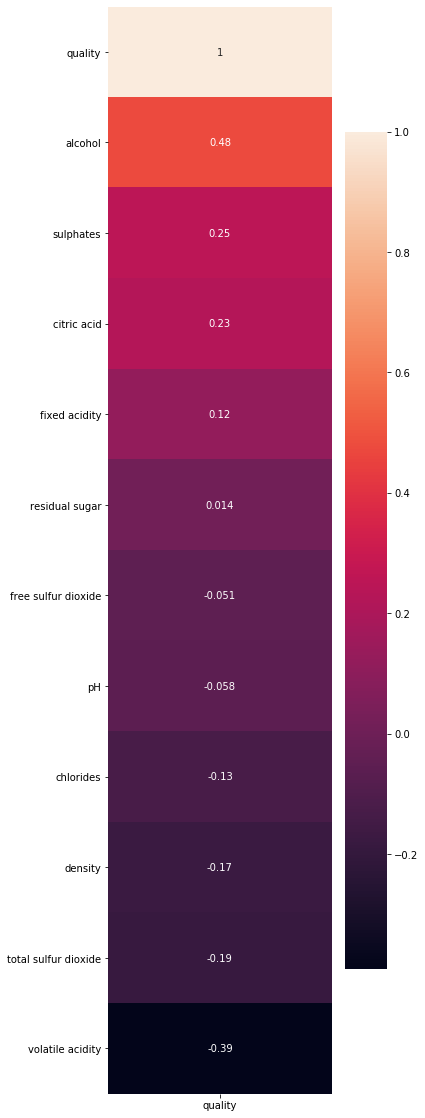

In [12]:
plt.figure(figsize=(5,20))
sns.heatmap(correlation[['quality']].sort_values(by=['quality'], ascending=False), annot=True)

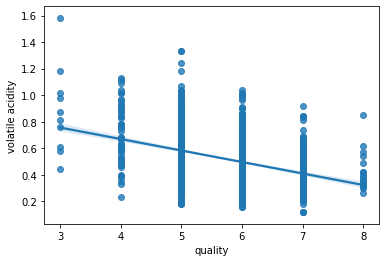

In [13]:
sns.regplot(x='quality', y='volatile acidity', data=df)

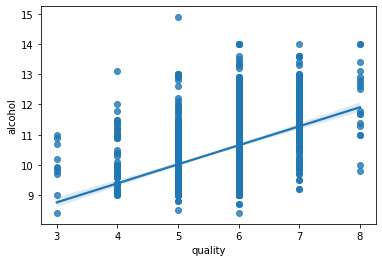

In [14]:
sns.regplot(x='quality', y='alcohol', data=df)

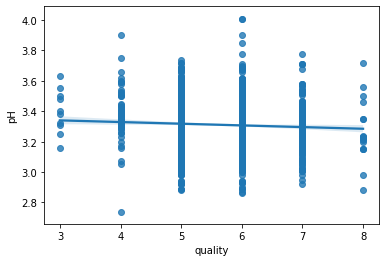

In [15]:
sns.regplot(x='quality', y='pH', data=df)

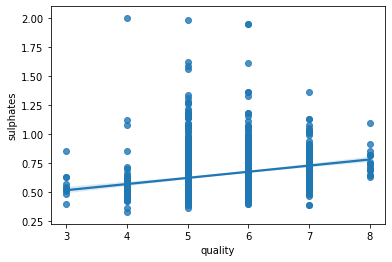

In [16]:
sns.regplot(x='quality', y='sulphates', data=df)

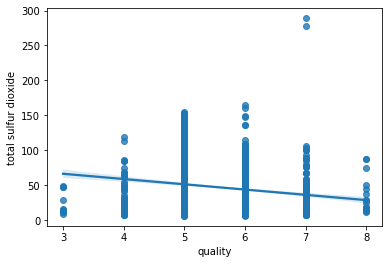

In [17]:
sns.regplot(x='quality', y='total sulfur dioxide', data=df)

__From these visualizations and correlation maps we see that 'alcohol', 'volatile acidity', 'sulphates' and 'total sulfur dioxide' are mostly affecting the quality of wine__

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
y= df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
x= df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
x.head()
x.shape

(1599, 11)

In [22]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
train_x, test_x, train_y, test_y= train_test_split(x,y, test_size= 0.2, random_state=2)

In [24]:
print(train_x.shape)
print(test_x.shape)

(1279, 11)
(320, 11)


## Decision tree Classifier

In [25]:
Ctree= DecisionTreeClassifier(criterion='entropy')
Ctree.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
predtree= Ctree.predict(test_x)
print(predtree[:5])
print(test_y[:5])

[6 6 6 6 4]
407     7
1220    6
1200    6
308     6
1328    5
Name: quality, dtype: int64


In [27]:
from sklearn.metrics import accuracy_score
print("Decision tree accuracy: {}". format(accuracy_score(test_y, predtree)))

Decision tree accuracy: 0.59375


In [28]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

C:\Users\Avi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


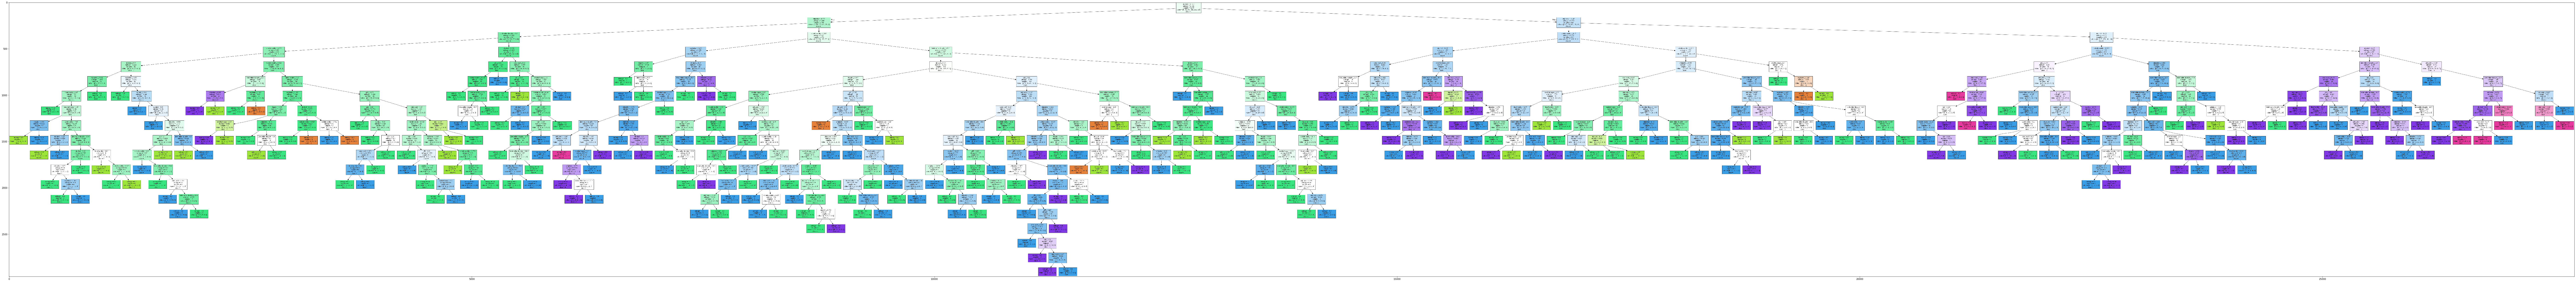

In [29]:
dot_data=StringIO()
filename='tree1.png'
features= x.columns
target= df['quality'].unique().tolist()
out= tree.export_graphviz(Ctree, feature_names=features, out_file=dot_data, 
                          class_names=str(target), filled=True, special_characters=True,rotate=False)
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img= mpimg.imread(filename)
plt.figure(figsize=(200,400))
plt.imshow(img, interpolation='nearest')

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
pred_forest= model.predict(test_x)
pred_prob= model.predict_proba(test_x)[:,1]

In [32]:
print("Random Forest accuracy: {}". format(accuracy_score(test_y, pred_forest)))

Random Forest accuracy: 0.690625


## Support Vector Classifier

In [33]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
pred_svc= svc.predict(test_x)
print("SVM accuracy: {}". format(accuracy_score(test_y, pred_svc)))

SVM accuracy: 0.54375
